# TRABAJO FINAL MODULO 6

## FUENTE : [DATOS ABIERTOS](https://www.datosabiertos.gob.pe/dataset/fallecidos-por-covid-19-ministerio-de-salud-minsa/resource/4b7636f3-5f0c-4404-8526 )

#AUTOR: Javier Chacanama Quispe

In [1]:
!pip install pyjanitor
import janitor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 6.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
DATASET_PATH = 'https://github.com/JavierChQ/datasets/raw/refs/heads/main/fallecidos_covid.csv'
df_covid = pd.read_csv(DATASET_PATH,sep = ";")
df_covid.head(10)

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID
0,20240317,20220219,63,MASCULINO,Criterio virológico,TUMBES,TUMBES,TUMBES,240101.0,203506.0
1,20240317,20210529,74,MASCULINO,Criterio virológico,TUMBES,TUMBES,TUMBES,240101.0,203532.0
2,20240317,20210623,72,FEMENINO,Criterio SINADEF,TACNA,TACNA,ALTO DE LA ALIANZA,230102.0,203584.0
3,20240317,20210824,85,MASCULINO,Criterio investigación Epidemiológica,TUMBES,TUMBES,TUMBES,240101.0,212541.0
4,20240317,20210627,46,MASCULINO,Criterio virológico,TACNA,TACNA,ALTO DE LA ALIANZA,230102.0,203665.0
5,20240317,20210423,58,MASCULINO,Criterio clínico,TUMBES,ZARUMILLA,ZARUMILLA,240301.0,221184.0
6,20240317,20210401,73,FEMENINO,Criterio virológico,TUMBES,ZARUMILLA,ZARUMILLA,240301.0,221211.0
7,20240317,20220914,92,FEMENINO,Criterio virológico,TUMBES,TUMBES,CORRALES,240102.0,229901.0
8,20240317,20210409,66,MASCULINO,Criterio virológico,PIURA,PIURA,CASTILLA,200104.0,846032.0
9,20240317,20211030,64,FEMENINO,Criterio SINADEF,PUNO,MOHO,MOHO,210901.0,846152.0


# EDA

In [47]:
df_covid.shape

(220918, 10)

In [48]:
df_covid.dtypes

,0
FECHA_CORTE,int64
FECHA_FALLECIMIENTO,int64
EDAD_DECLARADA,int64
SEXO,object
CLASIFICACION_DEF,object
DEPARTAMENTO,object
PROVINCIA,object
DISTRITO,object
UBIGEO,float64
UUID,float64


# TRATAMIENTO DE NULOS

In [49]:
df_covid.isnull().sum().sum()

np.int64(2484)

In [50]:
df_covid.isnull().sum()

,0
FECHA_CORTE,0
FECHA_FALLECIMIENTO,0
EDAD_DECLARADA,0
SEXO,0
CLASIFICACION_DEF,0
DEPARTAMENTO,0
PROVINCIA,5
DISTRITO,5
UBIGEO,5
UUID,2469


In [51]:
df_covid.dropna(subset=['UUID'],inplace=True)
df_covid.shape

(218449, 10)

# TRATAMIENTO DE DUPLICADOS

In [52]:
df_covid.duplicated().sum()

np.int64(4)

In [53]:
df_covid[df_covid.duplicated()]

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID
8868,20240317,20240110,66,MASCULINO,NotiCovid,PIURA,PIURA,CASTILLA,200104.0,1095095.0
49741,20240317,20240106,90,FEMENINO,NotiCovid,LA LIBERTAD,TRUJILLO,TRUJILLO,130101.0,8227117.0
49746,20240317,20240106,90,FEMENINO,NotiCovid,LA LIBERTAD,TRUJILLO,TRUJILLO,130101.0,8227117.0
90958,20240317,20240110,76,MASCULINO,NotiCovid,PIURA,PIURA,TAMBO GRANDE,200114.0,34581034.0


In [54]:
df_covid.drop_duplicates(keep='first',inplace=True)
df_covid.shape

(218445, 10)

# ANALIZANDO VARIABLES

##VARIABLE: FECHA_FALLECIMIENTO

In [55]:
df_covid['FECHA_FALLECIMIENTO'] = df_covid['FECHA_FALLECIMIENTO'].astype(str)
df_covid['FECHA_FALLECIMIENTO'] = pd.to_datetime(df_covid['FECHA_FALLECIMIENTO'], format='%Y%m%d')
df_covid.head(10)

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID
0,20240317,2022-02-19,63,MASCULINO,Criterio virológico,TUMBES,TUMBES,TUMBES,240101.0,203506.0
1,20240317,2021-05-29,74,MASCULINO,Criterio virológico,TUMBES,TUMBES,TUMBES,240101.0,203532.0
2,20240317,2021-06-23,72,FEMENINO,Criterio SINADEF,TACNA,TACNA,ALTO DE LA ALIANZA,230102.0,203584.0
3,20240317,2021-08-24,85,MASCULINO,Criterio investigación Epidemiológica,TUMBES,TUMBES,TUMBES,240101.0,212541.0
4,20240317,2021-06-27,46,MASCULINO,Criterio virológico,TACNA,TACNA,ALTO DE LA ALIANZA,230102.0,203665.0
5,20240317,2021-04-23,58,MASCULINO,Criterio clínico,TUMBES,ZARUMILLA,ZARUMILLA,240301.0,221184.0
6,20240317,2021-04-01,73,FEMENINO,Criterio virológico,TUMBES,ZARUMILLA,ZARUMILLA,240301.0,221211.0
7,20240317,2022-09-14,92,FEMENINO,Criterio virológico,TUMBES,TUMBES,CORRALES,240102.0,229901.0
8,20240317,2021-04-09,66,MASCULINO,Criterio virológico,PIURA,PIURA,CASTILLA,200104.0,846032.0
9,20240317,2021-10-30,64,FEMENINO,Criterio SINADEF,PUNO,MOHO,MOHO,210901.0,846152.0


In [56]:
df_covid['FECHA_FALLECIMIENTO'].sort_values(ascending=True)

,FECHA_FALLECIMIENTO
105918,2020-03-03
115087,2020-03-04
177377,2020-03-07
70449,2020-03-08
218320,2020-03-11
...,...
48748,2024-02-23
76939,2024-02-25
57945,2024-02-27
9125,2024-03-01


In [70]:

df_covid['MES'] = df_covid['FECHA_FALLECIMIENTO'].dt.to_period('M')
df_covid.head(10)

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID,MES
0,20240317,2022-02-19,63,MASCULINO,Criterio virológico,TUMBES,TUMBES,TUMBES,240101.0,203506.0,2022-02
1,20240317,2021-05-29,74,MASCULINO,Criterio virológico,TUMBES,TUMBES,TUMBES,240101.0,203532.0,2021-05
2,20240317,2021-06-23,72,FEMENINO,Criterio SINADEF,TACNA,TACNA,ALTO DE LA ALIANZA,230102.0,203584.0,2021-06
3,20240317,2021-08-24,85,MASCULINO,Criterio investigación Epidemiológica,TUMBES,TUMBES,TUMBES,240101.0,212541.0,2021-08
4,20240317,2021-06-27,46,MASCULINO,Criterio virológico,TACNA,TACNA,ALTO DE LA ALIANZA,230102.0,203665.0,2021-06
5,20240317,2021-04-23,58,MASCULINO,Criterio clínico,TUMBES,ZARUMILLA,ZARUMILLA,240301.0,221184.0,2021-04
6,20240317,2021-04-01,73,FEMENINO,Criterio virológico,TUMBES,ZARUMILLA,ZARUMILLA,240301.0,221211.0,2021-04
7,20240317,2022-09-14,92,FEMENINO,Criterio virológico,TUMBES,TUMBES,CORRALES,240102.0,229901.0,2022-09
8,20240317,2021-04-09,66,MASCULINO,Criterio virológico,PIURA,PIURA,CASTILLA,200104.0,846032.0,2021-04
9,20240317,2021-10-30,64,FEMENINO,Criterio SINADEF,PUNO,MOHO,MOHO,210901.0,846152.0,2021-10


In [71]:
df_serie = df_covid.groupby(['MES']).size().reset_index(name='FALLECIDOS')
df_serie

,MES,FALLECIDOS
0,2020-03,174
1,2020-04,5035
2,2020-05,16073
3,2020-06,17226
4,2020-07,18326
5,2020-08,17480
6,2020-09,8357
7,2020-10,4402
8,2020-11,3186
9,2020-12,3828


##GRAFICO DE LINEAS

In [61]:
df_serie['MES'] = df_serie['MES'].astype(str)

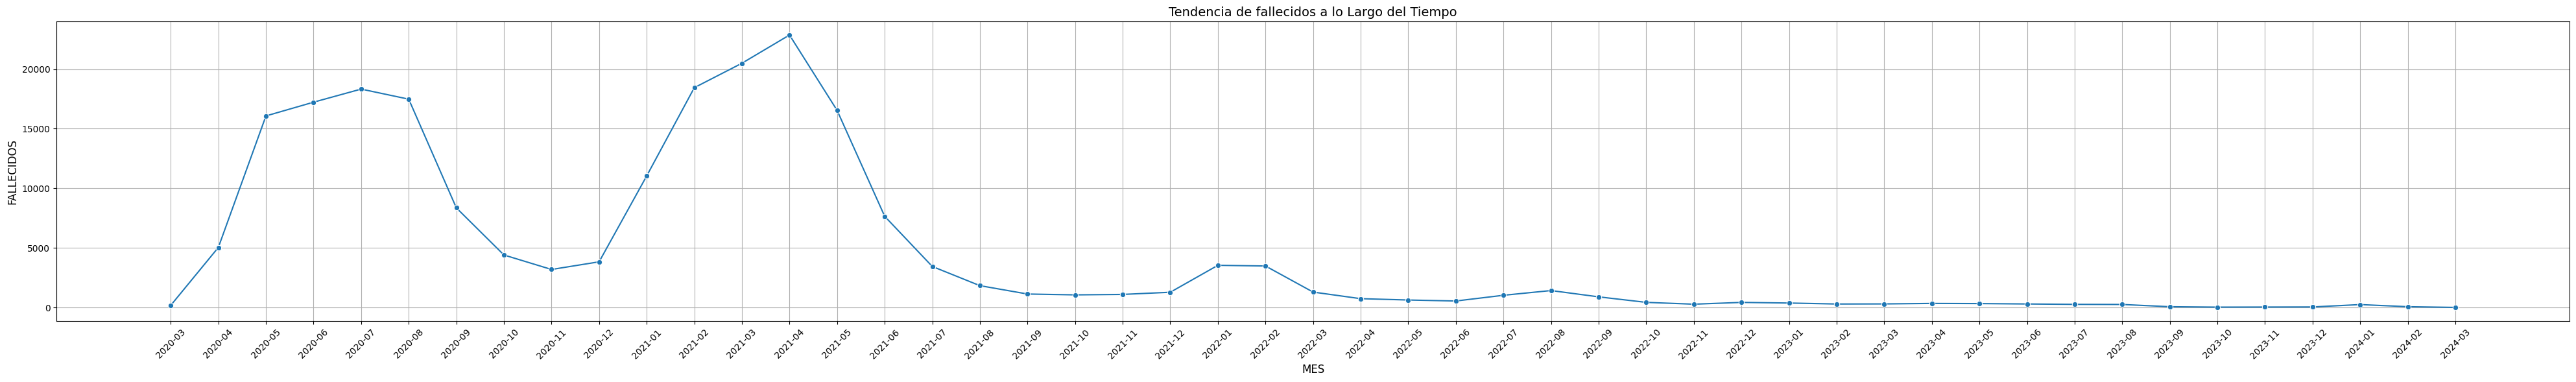

In [62]:
plt.figure(figsize=(50, 6))

# Crear el gráfico de línea
sns.lineplot(data=df_serie, x='MES', y='FALLECIDOS', marker='o', linestyle='-')

# Personalizar el gráfico
plt.title('Tendencia de fallecidos a lo Largo del Tiempo', fontsize=14)
plt.xlabel('MES', fontsize=12)
plt.ylabel('FALLECIDOS', fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.grid(True)

# Mostrar el gráfico
plt.show()

#ESCALAMIENTO DE VARIABLES Y CREAR SECUENCIA PARA X Y Y

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(df_serie['FALLECIDOS'].values.reshape(-1,1))
data

array([[0.0075234 ],
       [0.22014697],
       [0.70295687],
       [0.7533899 ],
       [0.80150468],
       [0.76450004],
       [0.36545359],
       [0.1924591 ],
       [0.13927041],
       [0.16735194],
       [0.48285364],
       [0.80666608],
       [0.89637827],
       [1.        ],
       [0.72334004],
       [0.33435395],
       [0.15029306],
       [0.07987053],
       [0.04916455],
       [0.04601522],
       [0.04772111],
       [0.05563818],
       [0.15453591],
       [0.15204269],
       [0.05633803],
       [0.03206194],
       [0.02716298],
       [0.0235325 ],
       [0.04452804],
       [0.0618931 ],
       [0.03875426],
       [0.01850232],
       [0.01180999],
       [0.0183711 ],
       [0.01605284],
       [0.0124661 ],
       [0.01281603],
       [0.0146094 ],
       [0.01404077],
       [0.01264106],
       [0.01119762],
       [0.01080395],
       [0.00253696],
       [0.00104978],
       [0.00135596],
       [0.00166215],
       [0.01041029],
       [0.002

In [64]:
# Crear secuencias para la serie temporal
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [65]:
seq_length = 24  # Usar 24 MESES
X, y = create_sequences(data, seq_length)

#DATASET DE ENTRENAMIENTO Y PRUEBA

In [66]:
from sklearn.model_selection import train_test_split

# Dividir en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#RED NEURONAL

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Construcción del modelo LSTM en TensorFlow
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25, activation="relu"),
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#ENTRENAMIENTO DE LA RED NEURONAL

In [68]:
model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 8.4058e-04 - val_loss: 2.2259e-04
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 1.7510e-04 - val_loss: 1.7520e-04
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - loss: 1.9046e-04 - val_loss: 2.2908e-04
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 2.5583e-04 - val_loss: 1.3483e-04
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 1.7540e-04 - val_loss: 6.5472e-05
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 1.1047e-04 - val_loss: 6.9081e-05
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 1.1026e-04 - val_loss: 1.0856e-04
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 1.3810e-04 - val_loss: 9.9343e-05
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 1.3467e-04 - val_loss: 6.8011e-05
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 1.0989e-04 - val_loss: 5.4797e-05
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 9.9726e-05 -

#PREDICCIONES

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step


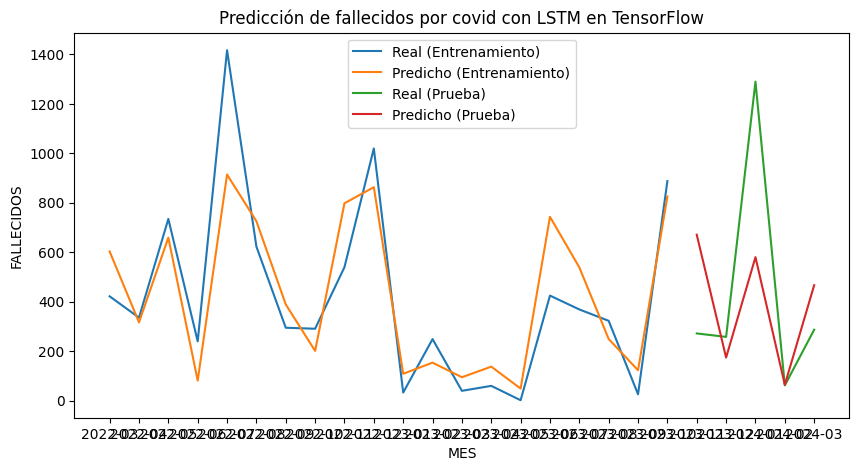

In [69]:
# Realizar predicciones
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
split = int(len(X) * 0.8)
# Graficar resultados
plt.figure(figsize=(10, 5))
plt.plot(df_serie["MES"][seq_length:split+seq_length], scaler.inverse_transform(y_train), label="Real (Entrenamiento)")
plt.plot(df_serie["MES"][seq_length:split+seq_length], scaler.inverse_transform(y_pred_train), label="Predicho (Entrenamiento)")
plt.plot(df_serie["MES"][split+seq_length:], scaler.inverse_transform(y_test), label="Real (Prueba)")
plt.plot(df_serie["MES"][split+seq_length:], scaler.inverse_transform(y_pred_test), label="Predicho (Prueba)")
plt.legend()
plt.xlabel("MES")
plt.ylabel("FALLECIDOS")
plt.title("Predicción de fallecidos por covid con LSTM en TensorFlow")
plt.show()